# Blended Survival Function Estimation

Exploring how well the regularly varying projection method can recover probabilities of different distributions.

March 2024
Jimmy Butler

In [4]:
library(mvtnorm)
library(dplyr)
library(ggplot2)
library(tidyverse)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_c

## t-copula, t margins

Copula parameters: $\nu = 4, \Sigma = \begin{bmatrix} 1 & 0.7 \\ 0.7 & 1 \end{bmatrix}$

Marginal parameters: $\nu=4$

In [23]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_tests/gamma_0.5/bivt.RData')

### $\theta = \pi/4$

In [24]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

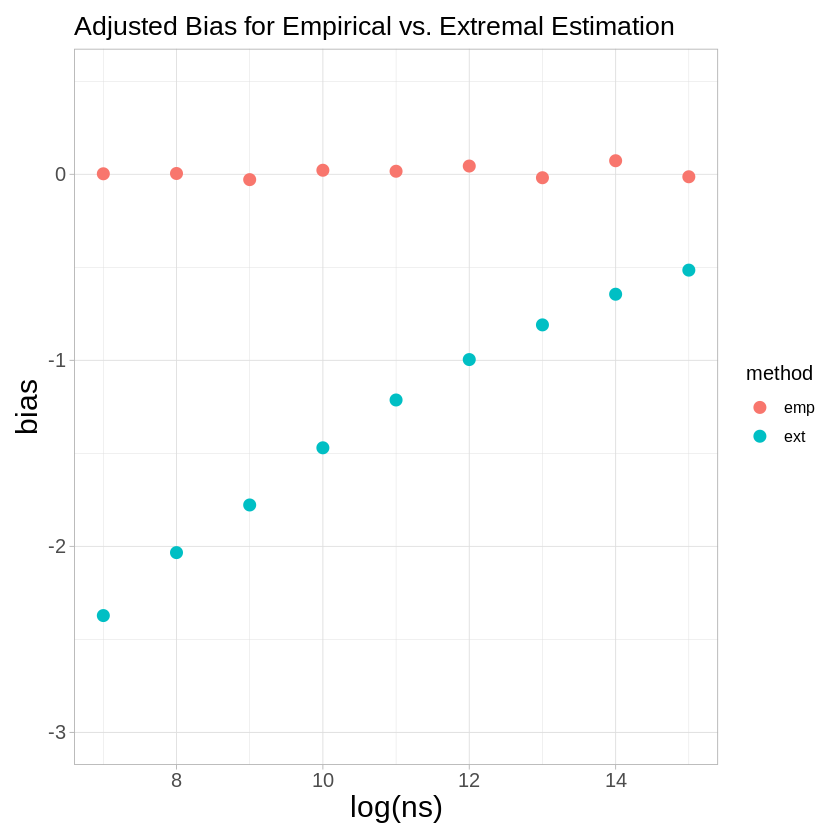

In [25]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + ylim(c(-3, 0.5)) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


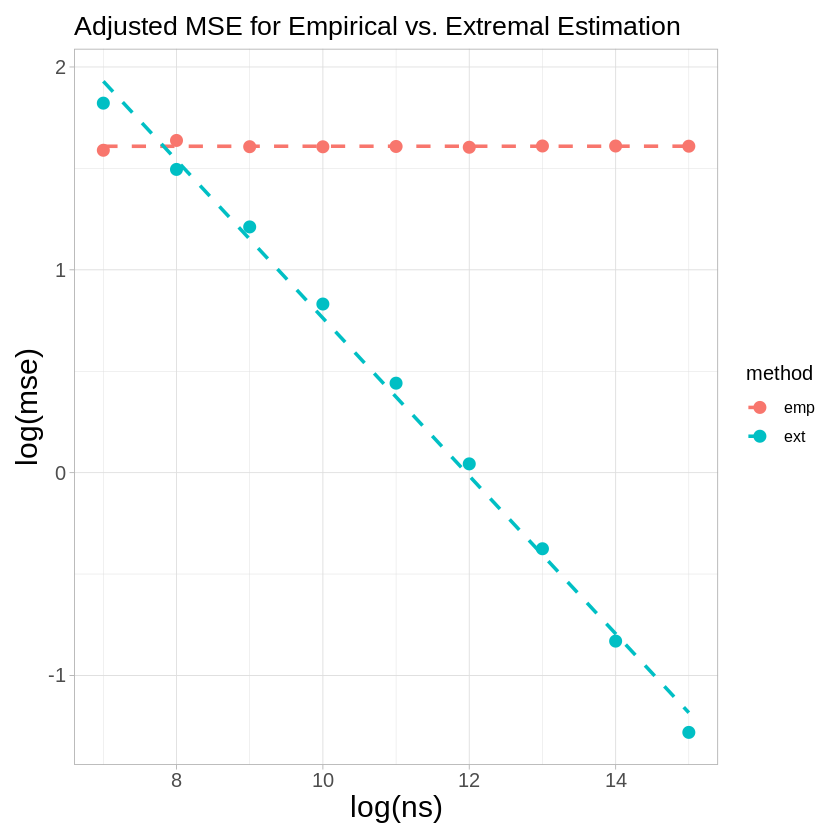

In [6]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [10]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  4.6534457  -0.3891356

In [11]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
1.6086841387 0.0000440089

### $\theta = 0$

In [12]:
angle_res <- res[['0']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

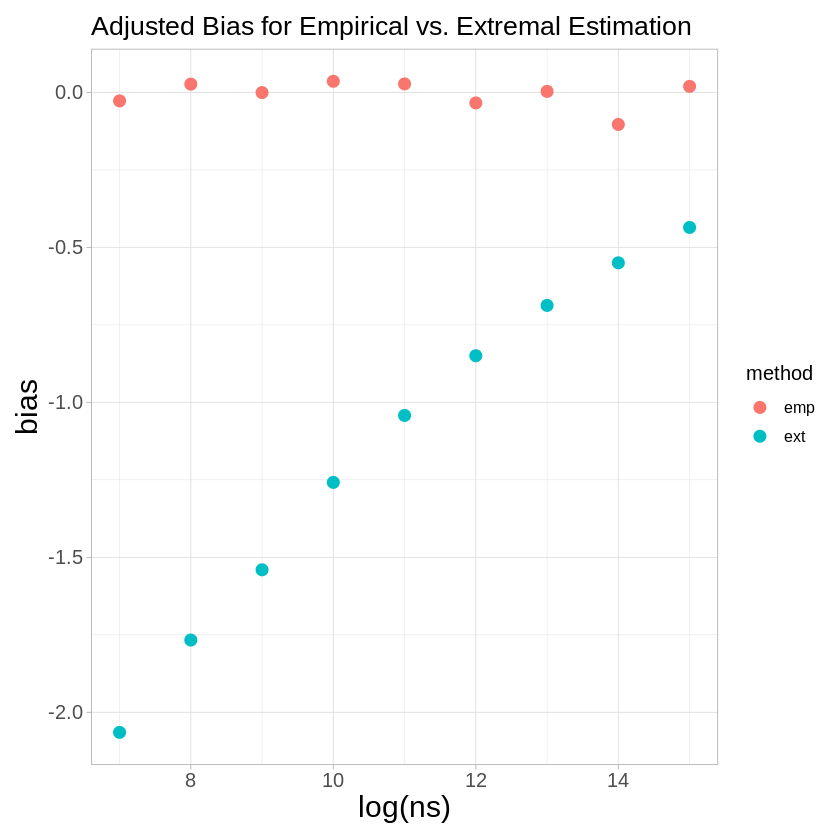

In [13]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


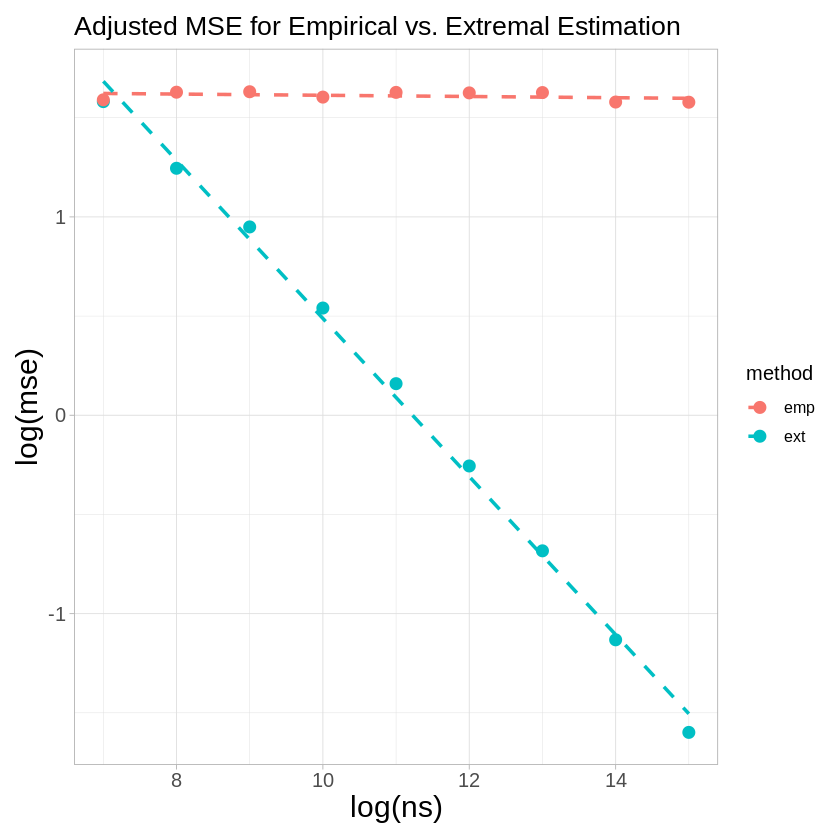

In [14]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [15]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  4.4732903  -0.3985216

In [16]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
 1.643696860 -0.003068832

### $\theta = \pi/2$

In [17]:
angle_res <- res[['pi/2']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

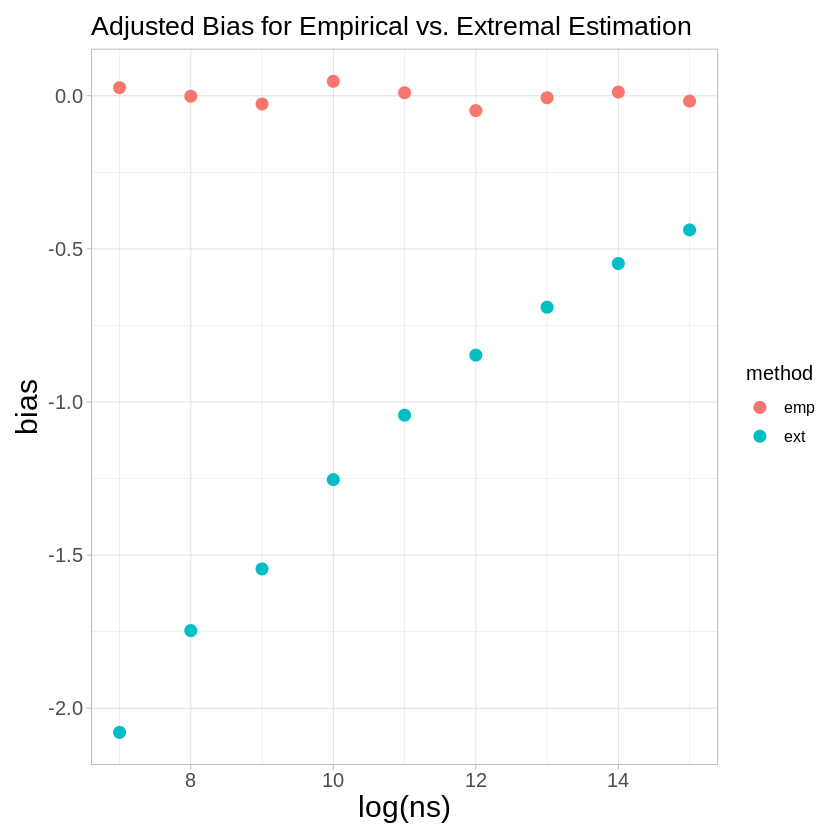

In [18]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


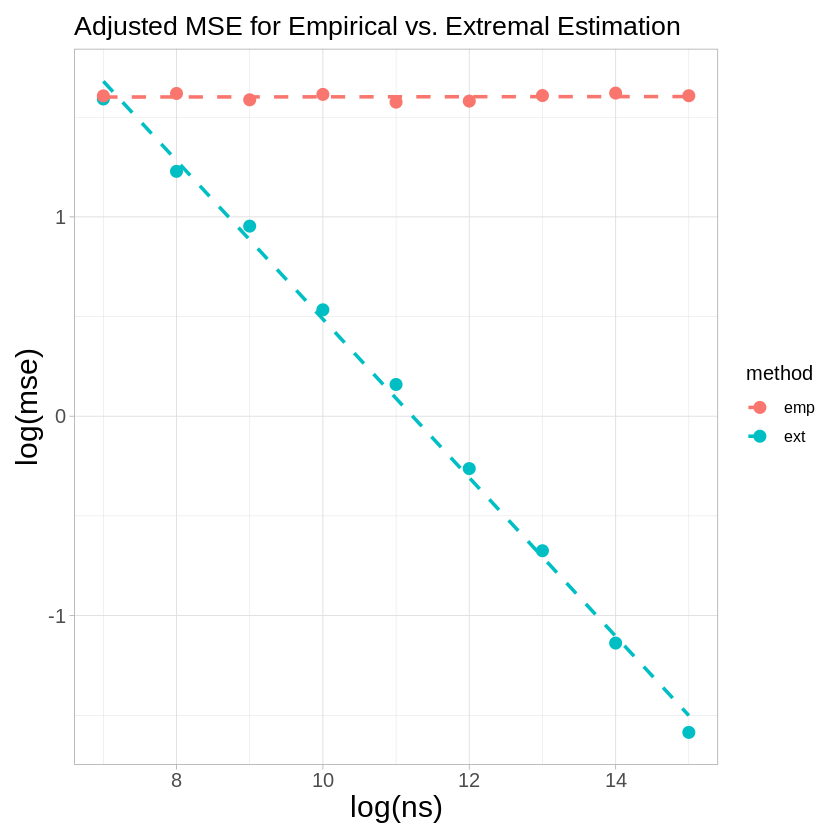

In [19]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [20]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  4.4640963  -0.3976931

In [21]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
1.5990448655 0.0003032959

## t-copula, pareto margins

Copula parameters: $\nu = 1, \Sigma = \begin{bmatrix} 1 & 0.7 \\ 0.7 & 1 \end{bmatrix}$

Marginal parameters: $\alpha = 1$

In [112]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_tests/gamma_0.5/bivt_copula_pareto_margins.RData')

### $\theta = \pi/4$

In [113]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

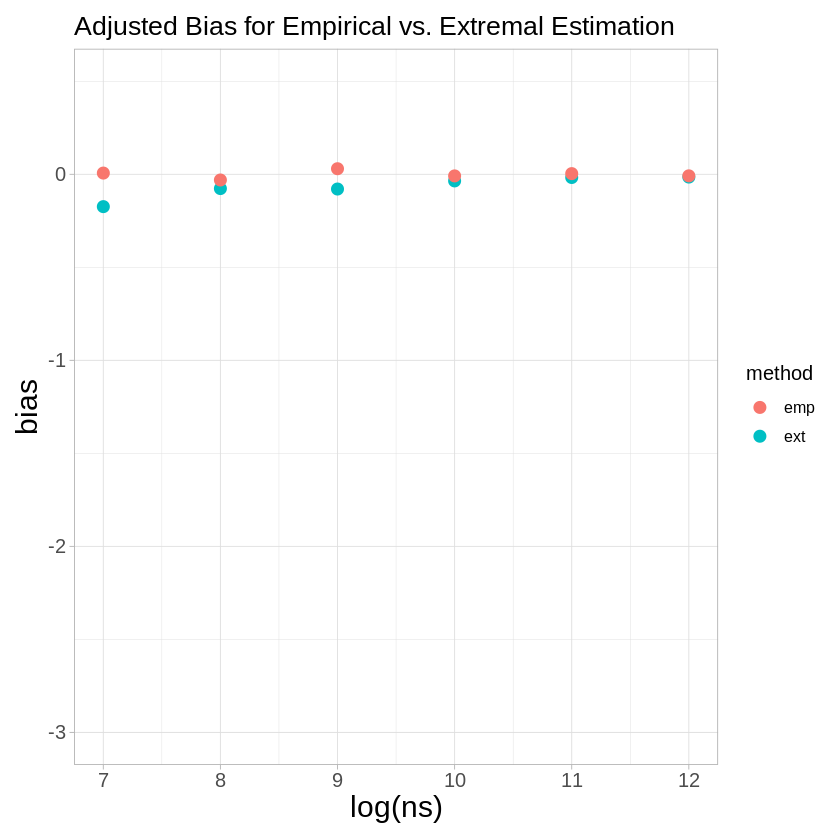

In [116]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + ylim(c(-3, 0.5)) +
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


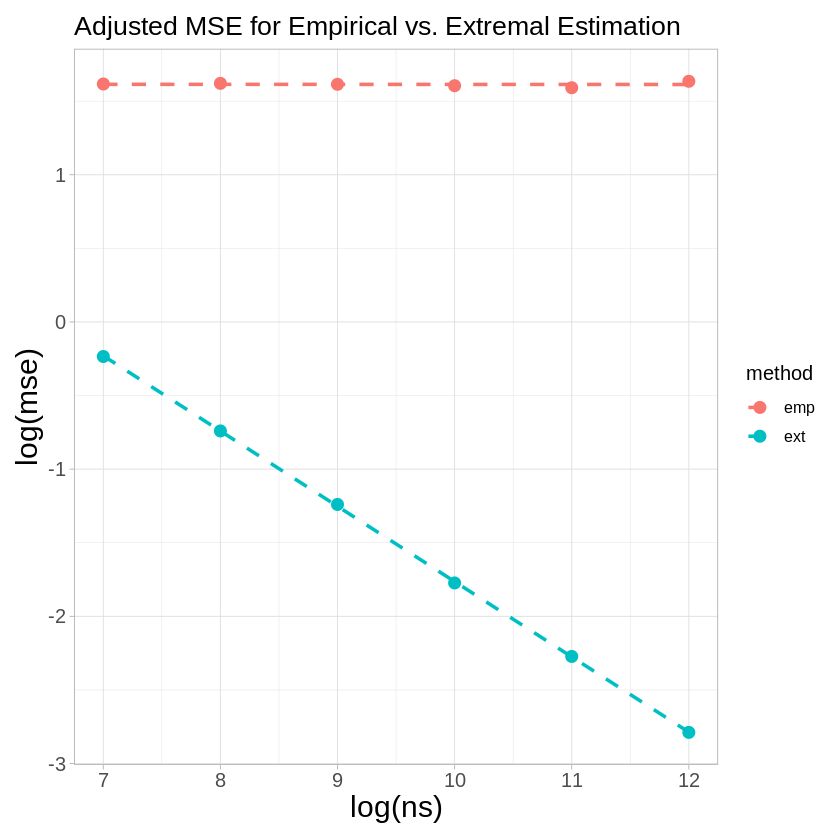

In [73]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [74]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.3496790  -0.5113496

In [75]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
 1.615479673 -0.000191119

### $\theta=\pi/2$

In [76]:
angle_res <- res[['pi/2']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

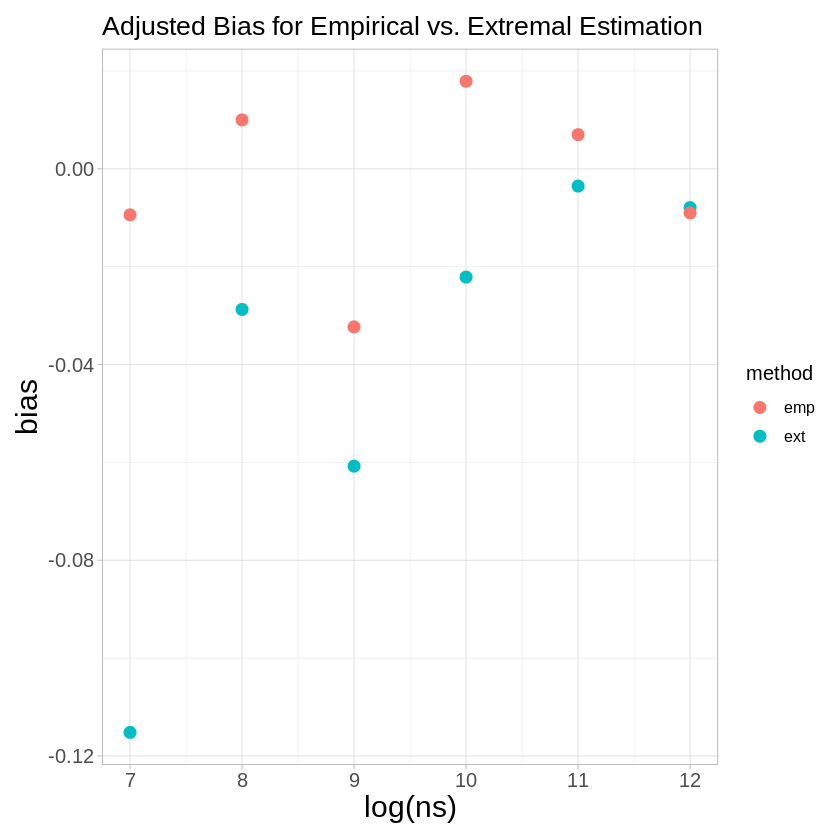

In [77]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


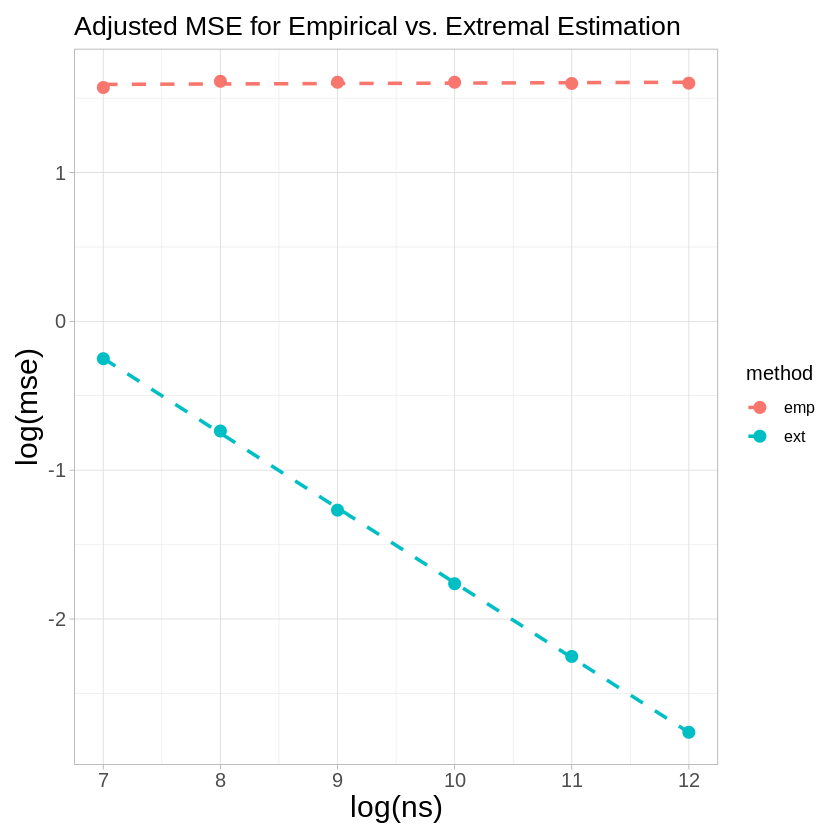

In [78]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [79]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.2695637  -0.5026179

### $\theta=0$

In [80]:
angle_res <- res[['0']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

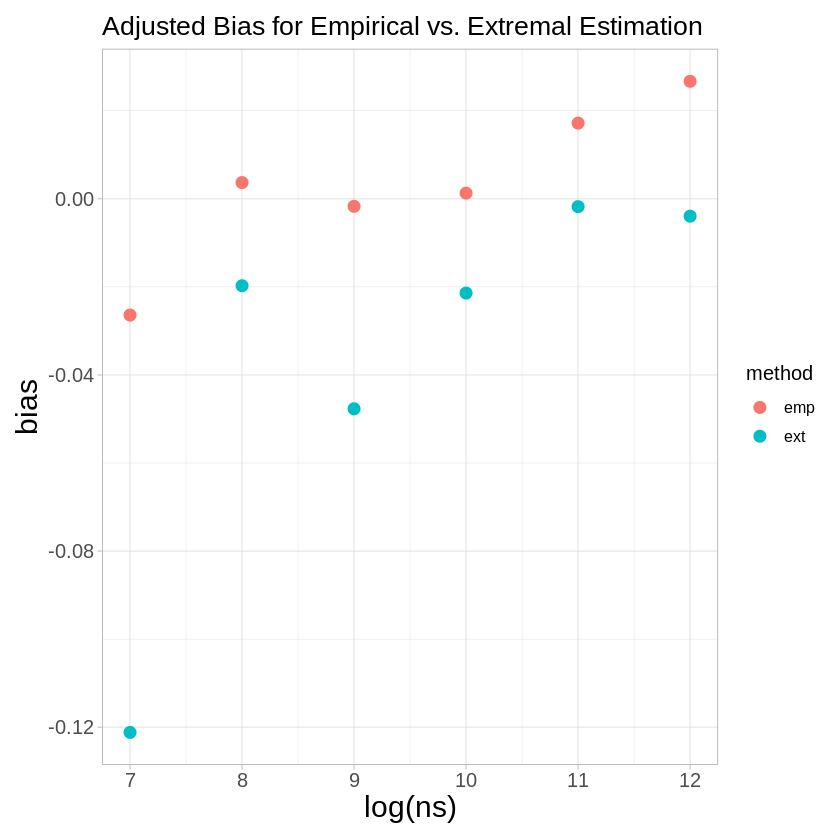

In [81]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


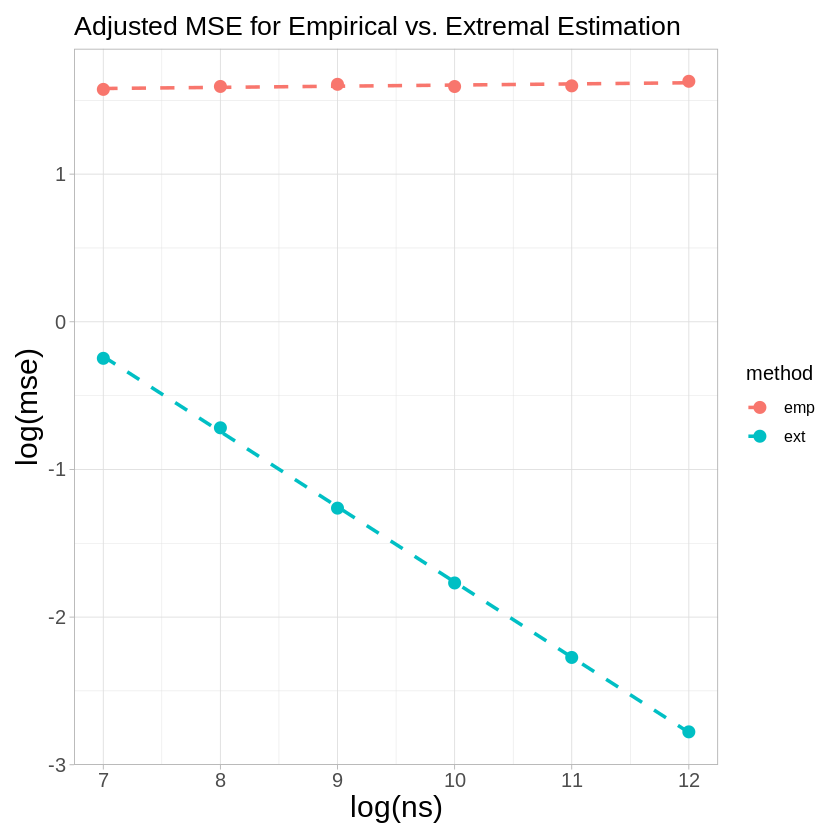

In [82]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [83]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.3297025  -0.5092169

### $\gamma = 3/4$

In [84]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_tests/gamma_0.75/bivt_copula_pareto_margins.RData')

#### $\theta = \pi/4$

In [85]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

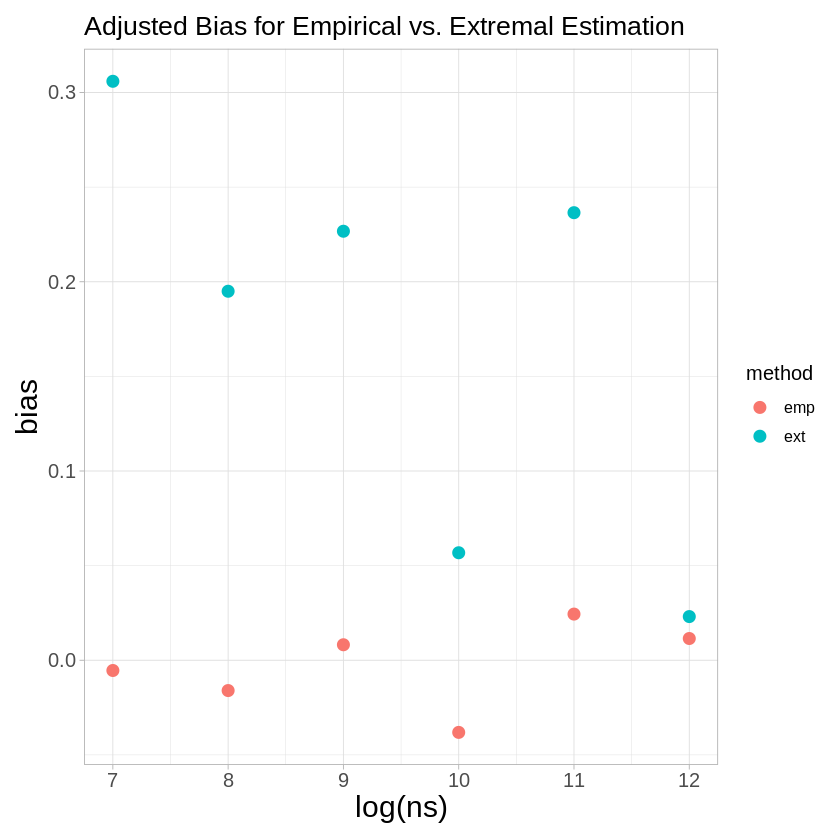

In [86]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


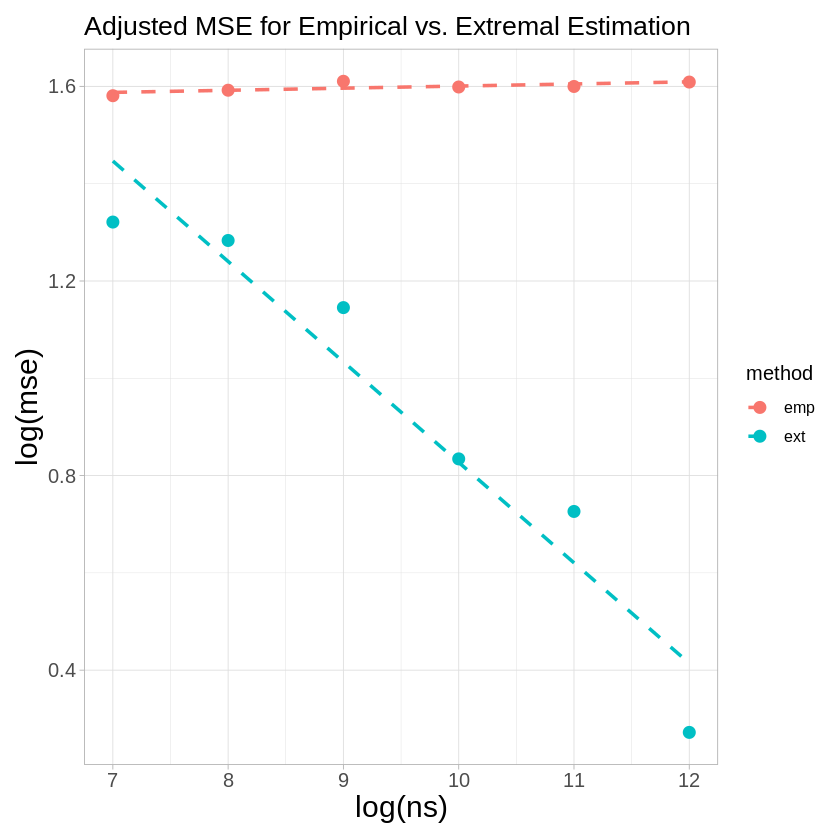

In [87]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [88]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  2.8922161  -0.2065055

In [89]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)     log(ns) 
1.557348804 0.004334706

#### $\theta=\pi/2$

In [90]:
angle_res <- res[['pi/2']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

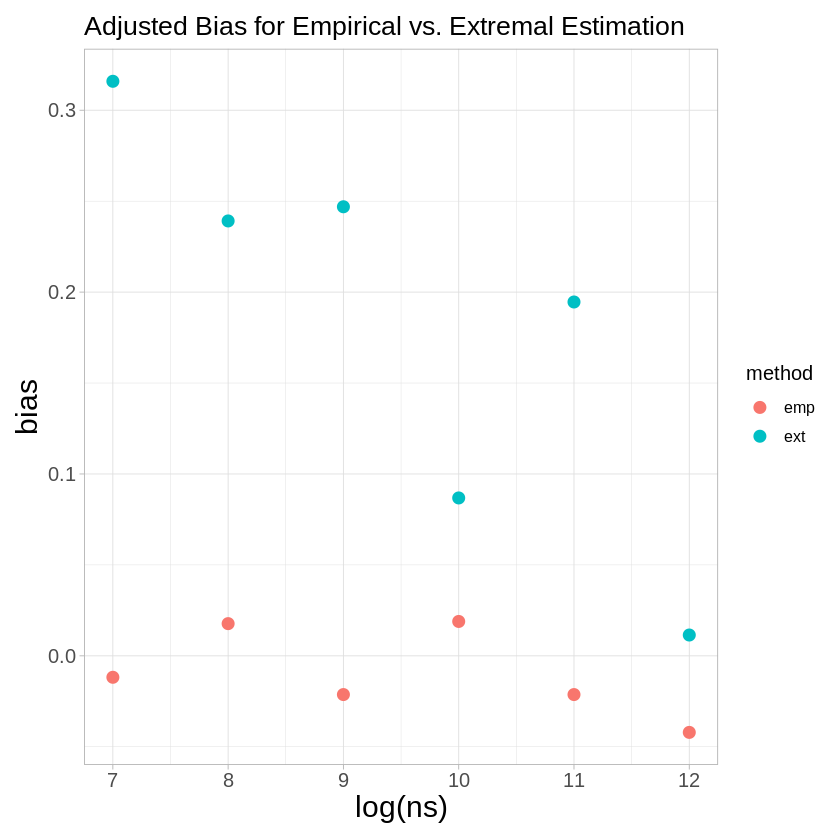

In [91]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


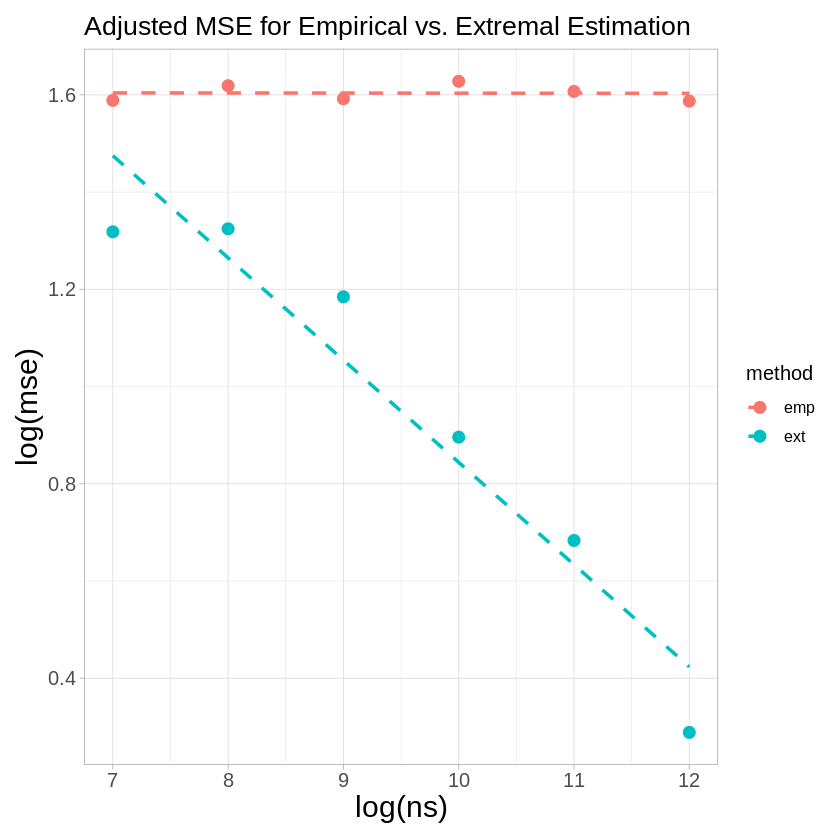

In [92]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [93]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  2.9468351  -0.2102782

#### $\theta=0$

In [94]:
angle_res <- res[['0']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

In [17]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

ERROR: [1m[33mError[39m:[22m
[1m[22m[33m![39m Cannot use `+` with a single argument
[36mℹ[39m Did you accidentally put `+` on a new line?


`geom_smooth()` using formula = 'y ~ x'


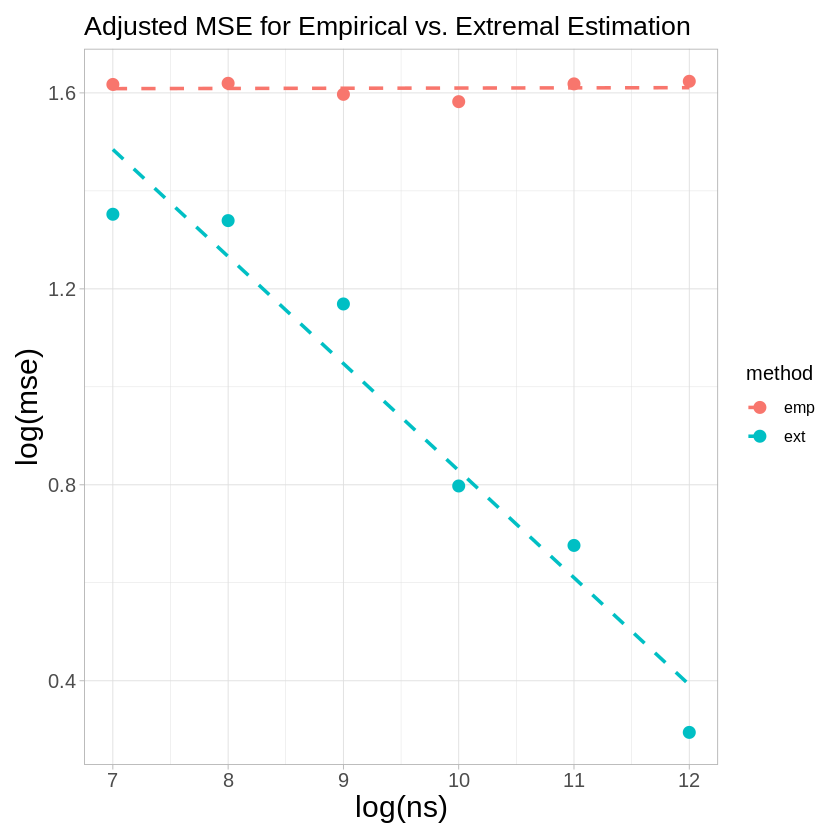

In [96]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [97]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.0146149  -0.2185672

### $\gamma = 1/4$

In [98]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_tests/gamma_0.25/bivt_copula_pareto_margins.RData')

### $\theta = \pi/4$

In [99]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

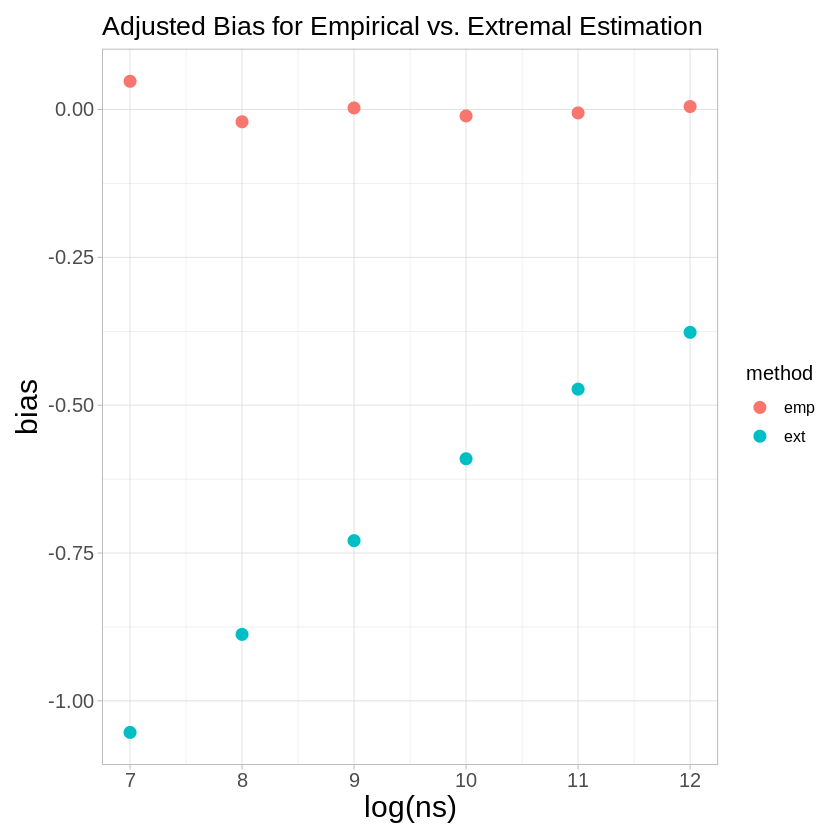

In [100]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


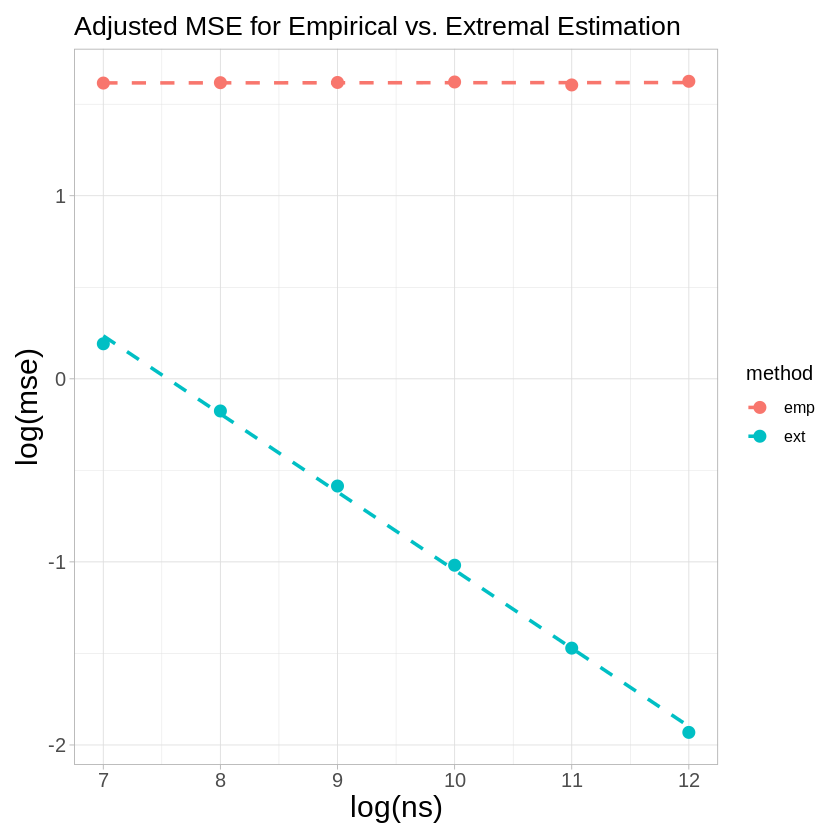

In [101]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [102]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.2211984  -0.4266338

In [103]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
1.6132086114 0.0004022279

In [9]:
exp(1.6132086)

[1] 5.018889

### $\theta=\pi/2$

In [104]:
angle_res <- res[['pi/2']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

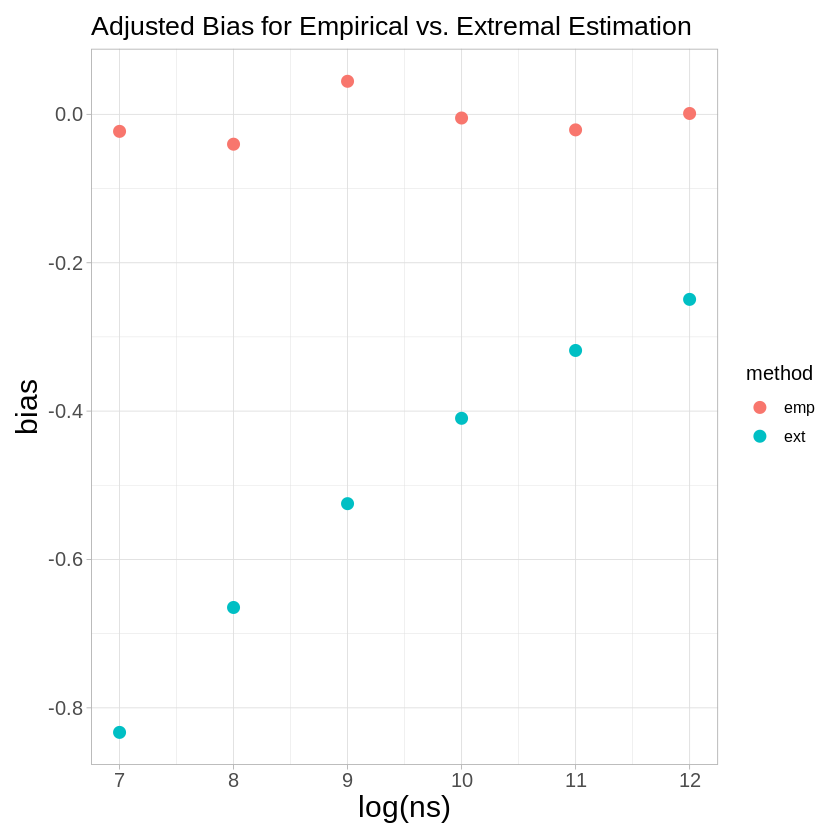

In [105]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


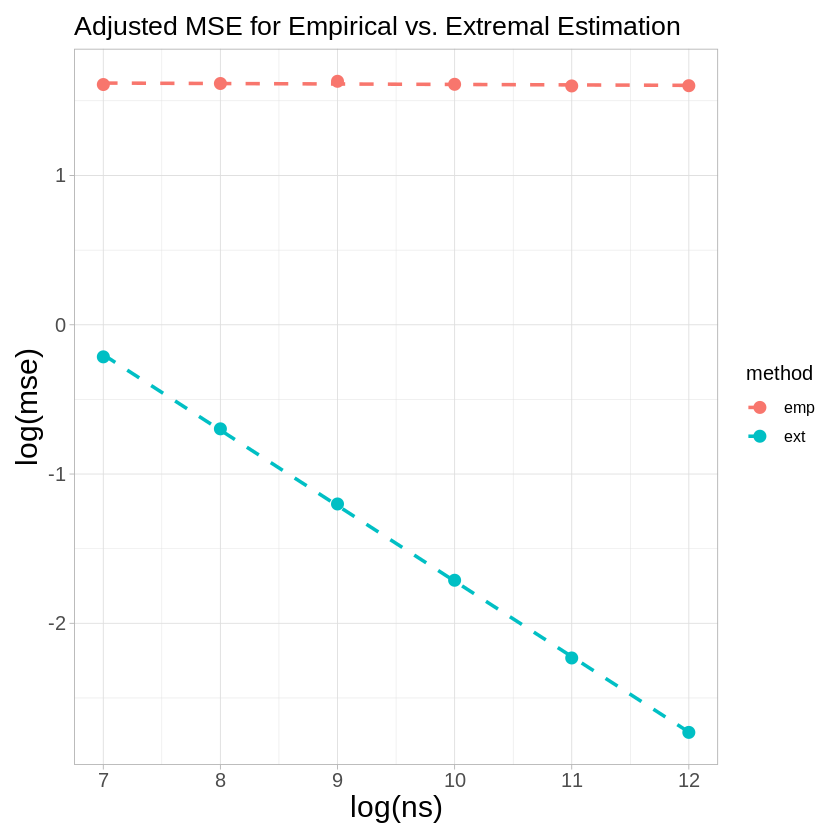

In [106]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [107]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.3382909  -0.5055626

### $\theta=0$

In [108]:
angle_res <- res[['0']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

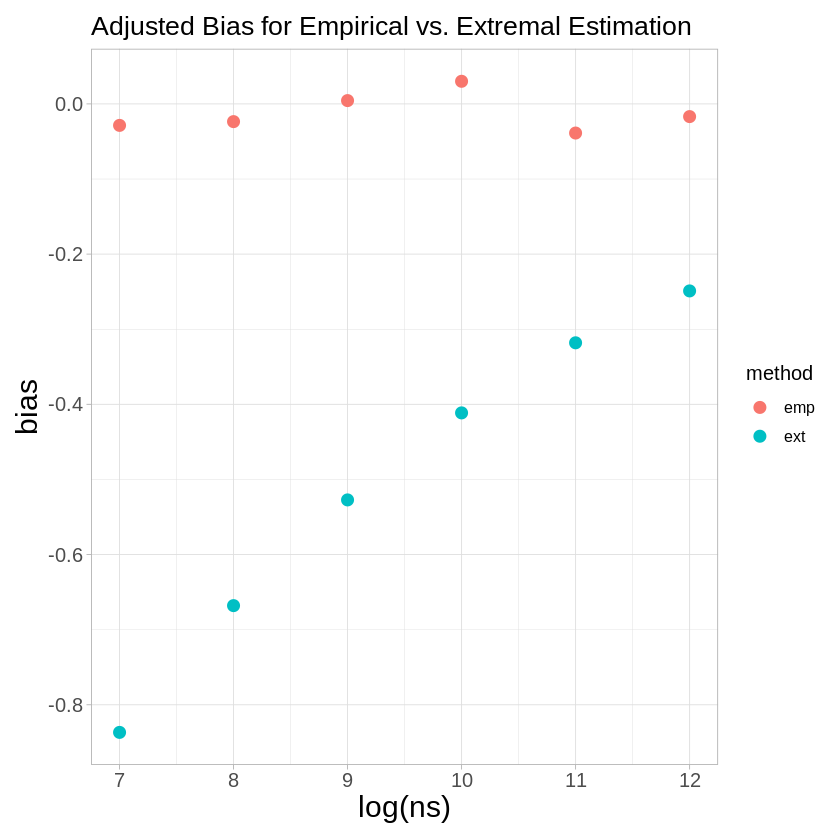

In [109]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


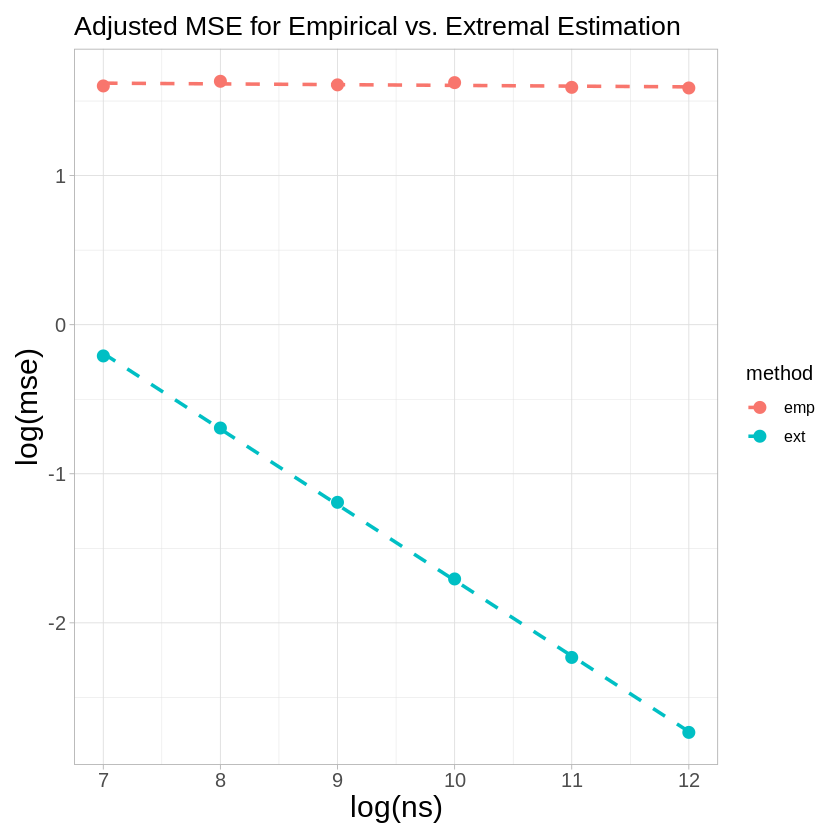

In [110]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [111]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.3584239  -0.5073351

## t-copula, pareto margins

Copula parameters: $\nu = 4, \Sigma = \begin{bmatrix} 1 & 0.7 \\ 0.7 & 1 \end{bmatrix}$

Marginal parameters: $\alpha = 1$

In [10]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_tests/gamma_0.5/bivt_copula4_pareto1_margins.RData')

### $\theta = \pi/4$

In [11]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

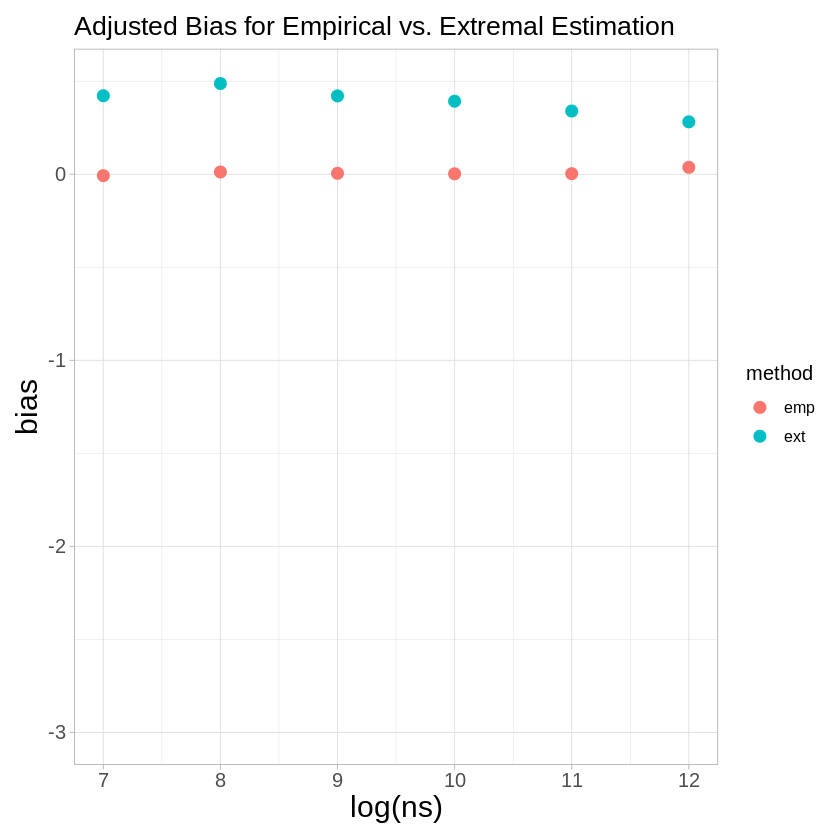

In [12]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + ylim(c(-3, 0.5)) +
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


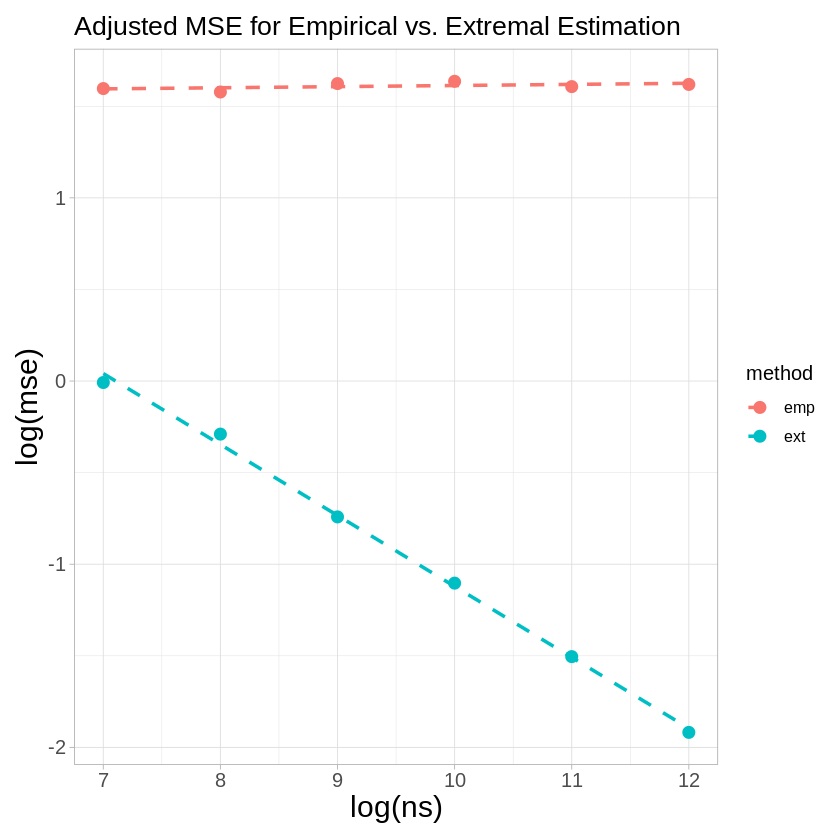

In [13]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [14]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  2.7519331  -0.3873113

In [15]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)     log(ns) 
1.552060949 0.006110244

### $\theta=\pi/2$

In [16]:
angle_res <- res[['pi/2']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

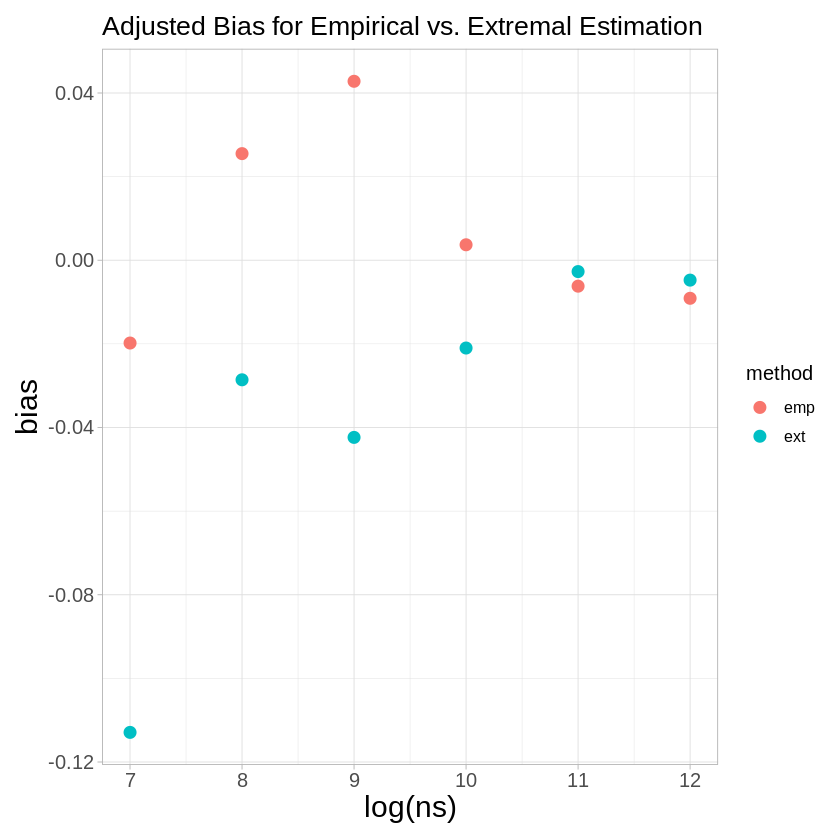

In [17]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


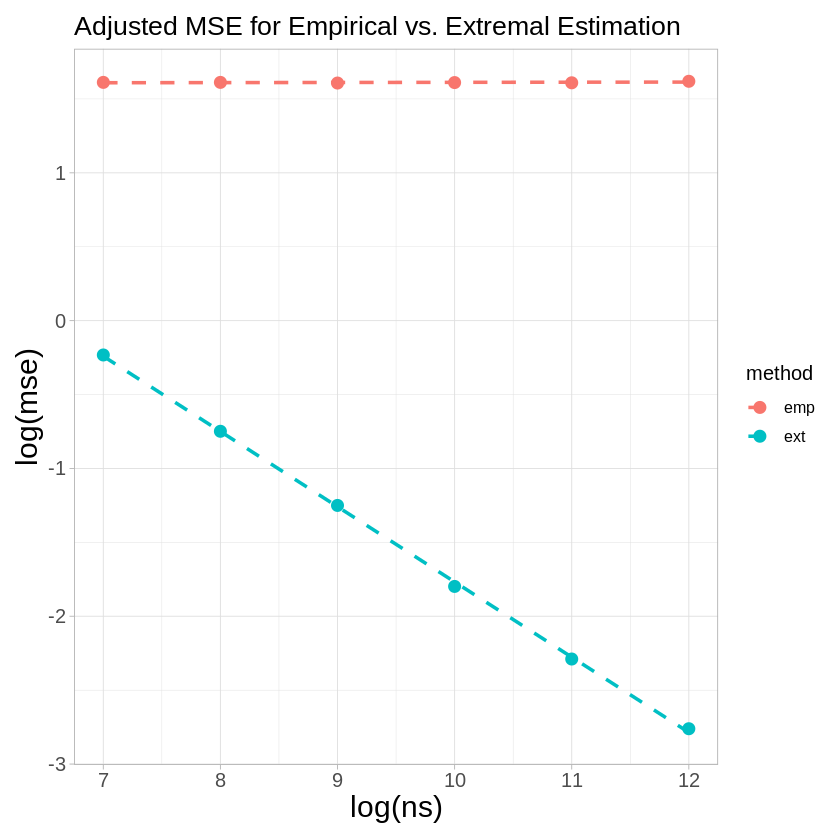

In [18]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [19]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.3221849  -0.5089948

### $\theta=0$

In [14]:
angle_res <- res[['0']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

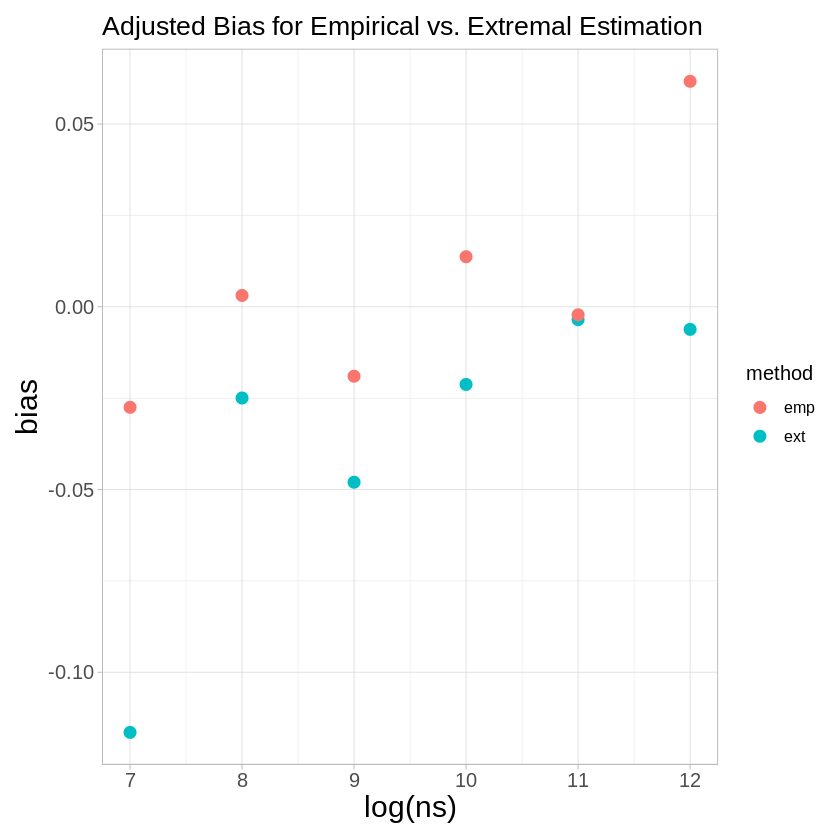

In [15]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


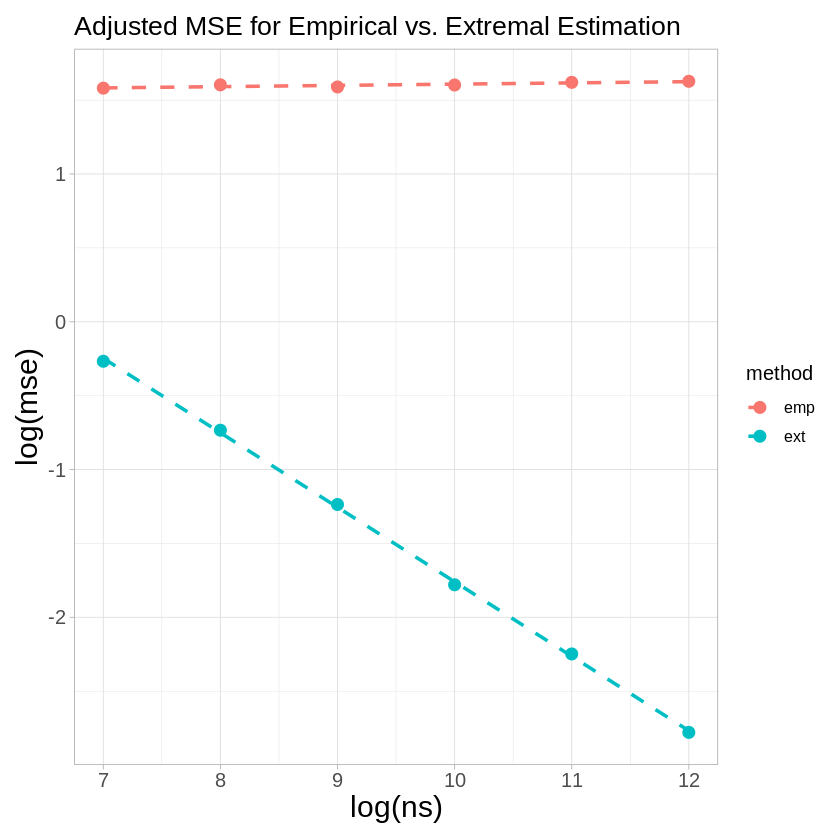

In [16]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [17]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.2814821  -0.5040878

## t-copula, pareto margins

Copula parameters: $\nu = 4, \Sigma = \begin{bmatrix} 1 & 0.7 \\ 0.7 & 1 \end{bmatrix}$

Marginal parameters: $\alpha = 4$

In [4]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_tests/gamma_0.5/bivt_copula4_pareto4_margins.RData')

### $\theta = \pi/4$

In [5]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


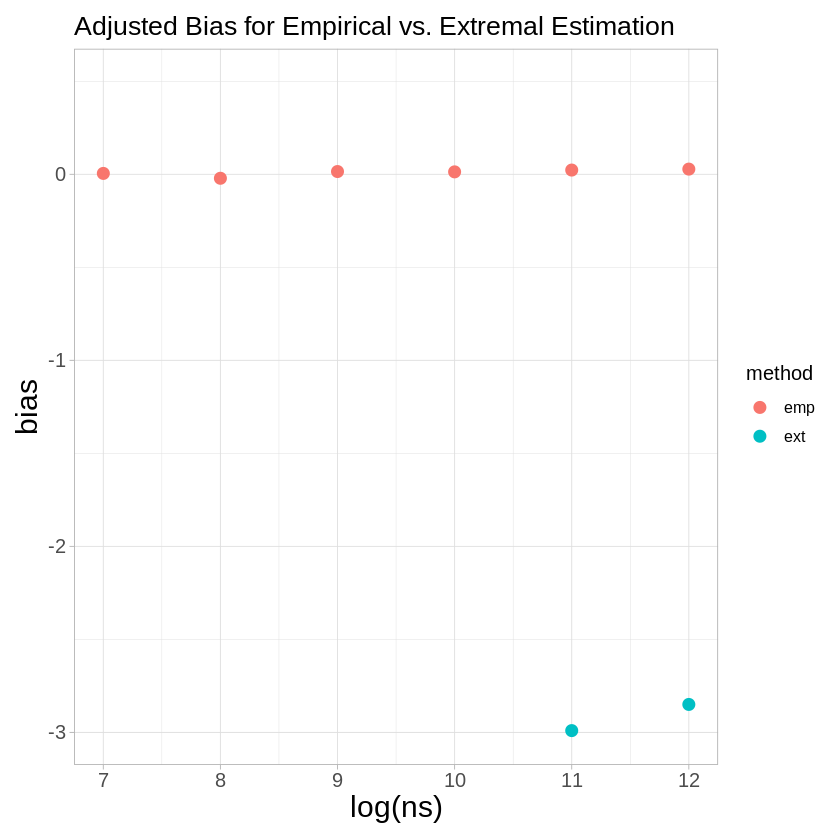

In [6]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + ylim(c(-3, 0.5)) +
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


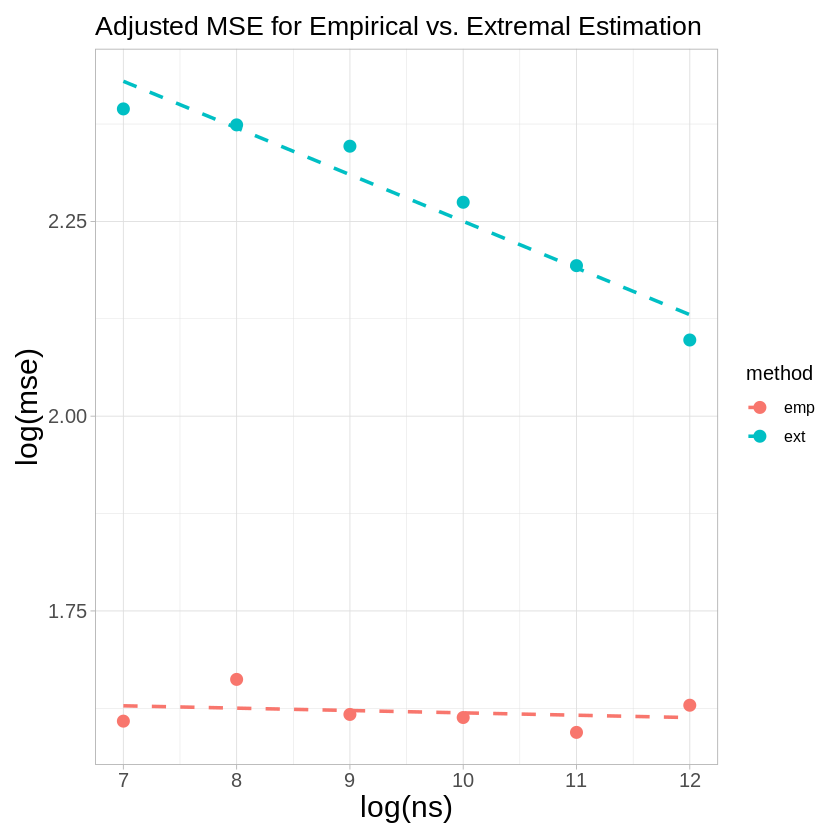

In [29]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [30]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
 2.84936650 -0.05992439

In [31]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
 1.649404599 -0.003025907

### $\theta=\pi/2$

In [32]:
angle_res <- res[['pi/2']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

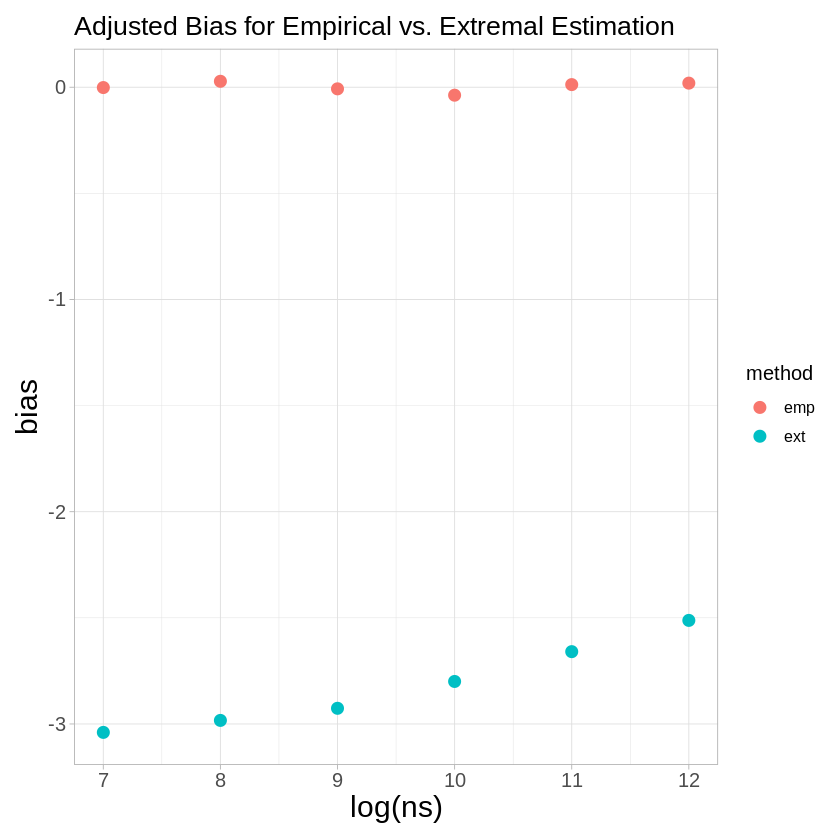

In [33]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


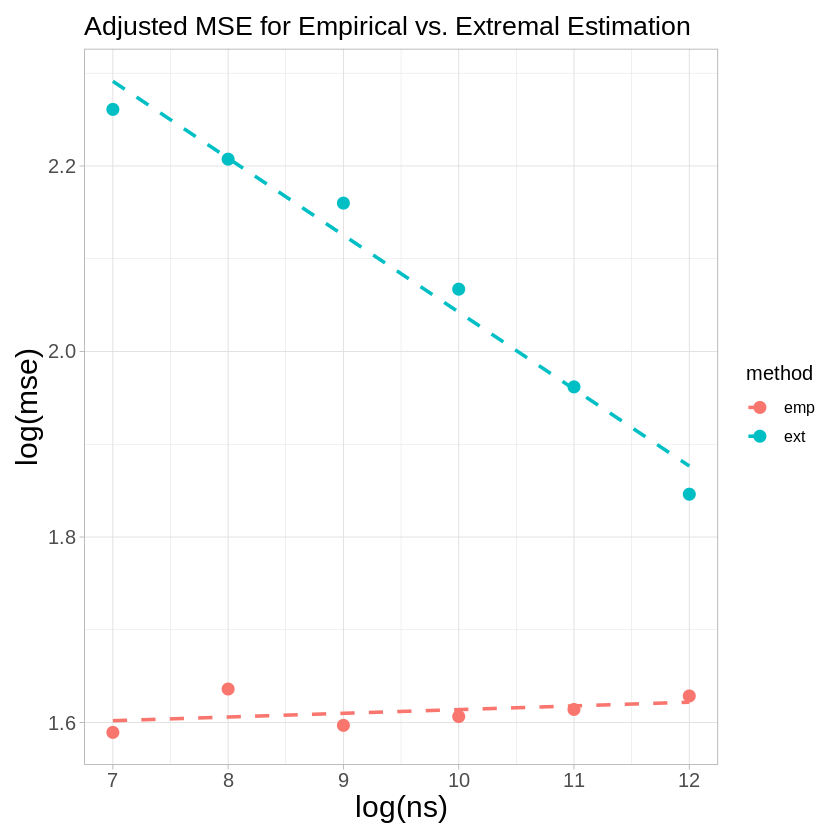

In [34]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [35]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
 2.87192448 -0.08294916

### $\theta=0$

In [36]:
angle_res <- res[['0']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

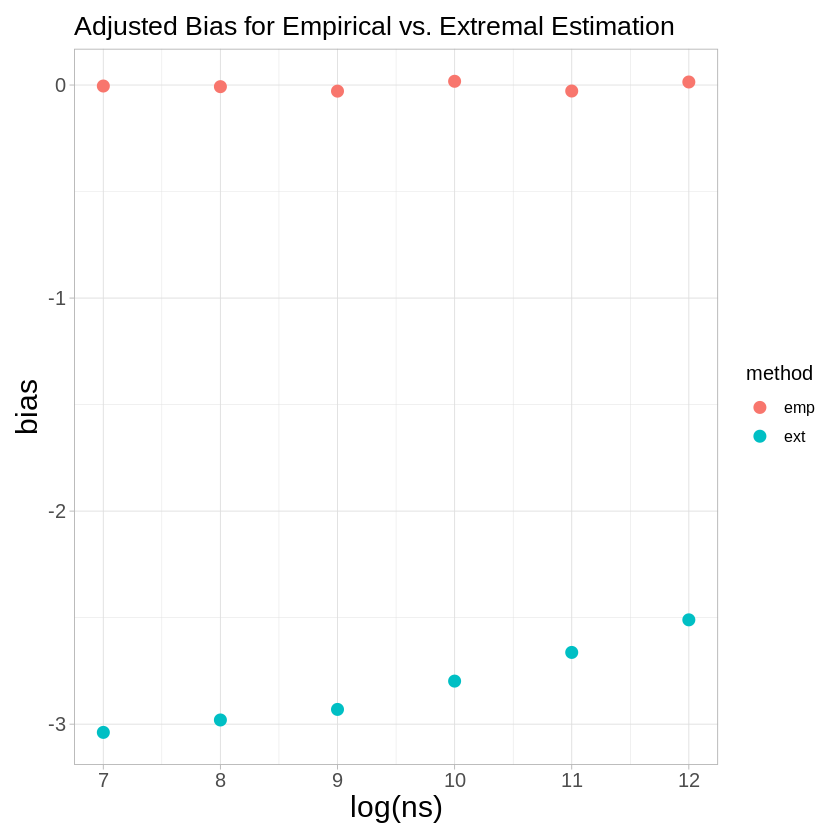

In [37]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + 
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


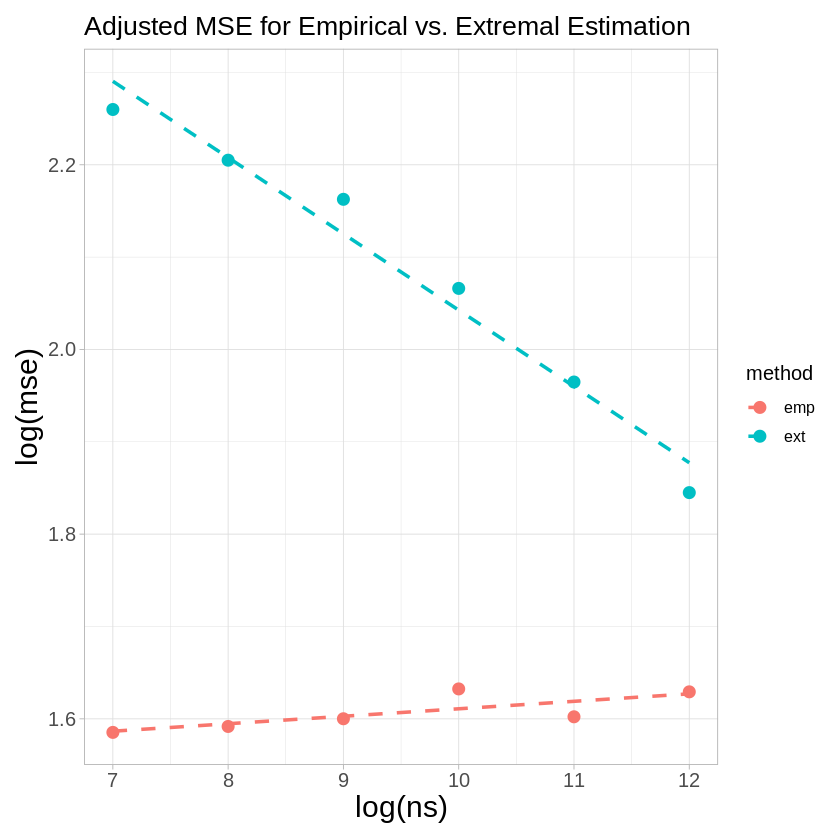

In [38]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [17]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
  3.2814821  -0.5040878

## t-copula, pareto margins

Copula parameters: $\nu = 8, \Sigma = \begin{bmatrix} 1 & 0.7 \\ 0.7 & 1 \end{bmatrix}$

Marginal parameters: $\alpha = 1$

In [2]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_probability_tests/rv_index_known/gamma_0.5/bivt_copula8_pareto1_margins.RData')

### $\theta = \pi/4$

In [5]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

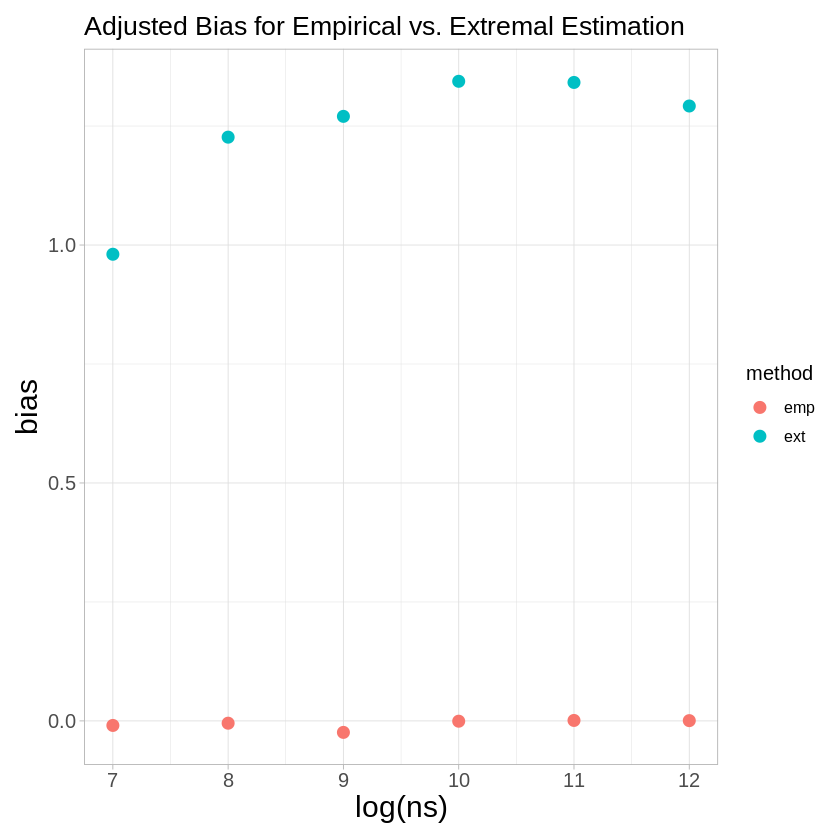

In [7]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() +
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


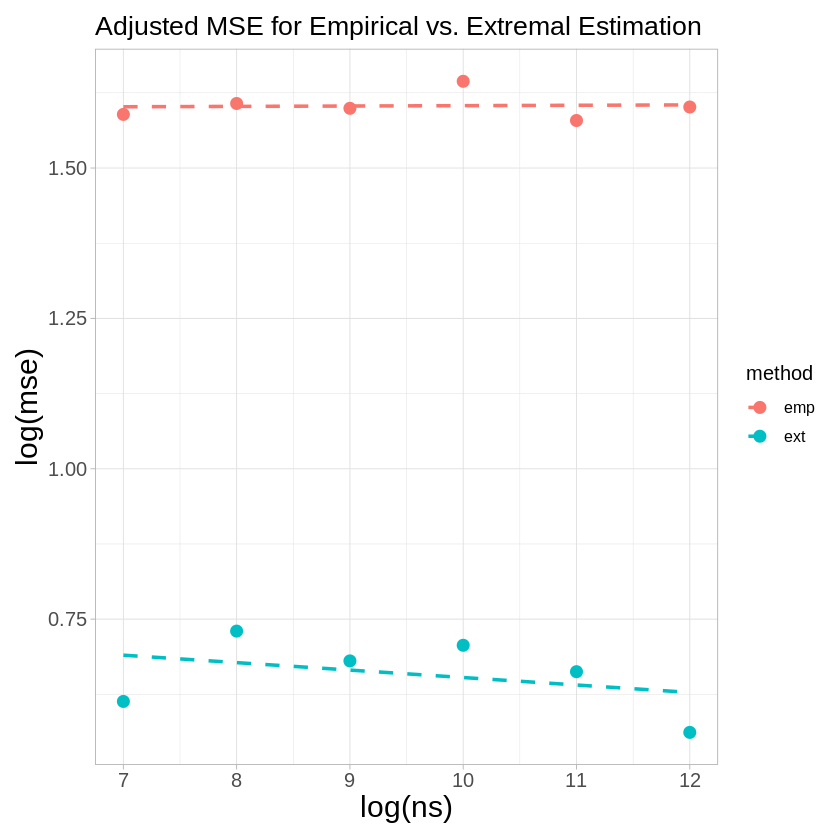

In [8]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [30]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
 2.84936650 -0.05992439

In [31]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
 1.649404599 -0.003025907

## t-copula, pareto margins

Copula parameters: $\nu = 4, \Sigma = \begin{bmatrix} 1 & 0.9 \\ 0.9 & 1 \end{bmatrix}$

Marginal parameters: $\alpha = 1$

In [10]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_probability_tests/rv_index_known/gamma_0.5/bivt_copula_dof4corr0.9_pareto1_margins.RData')

### $\theta = \pi/4$

In [11]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

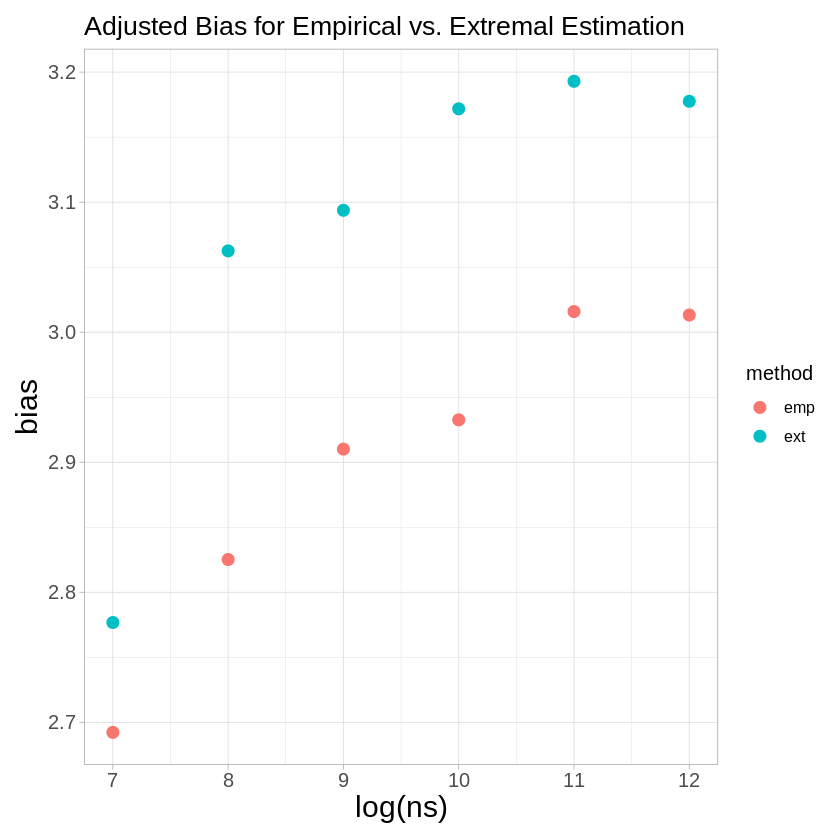

In [12]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() +
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


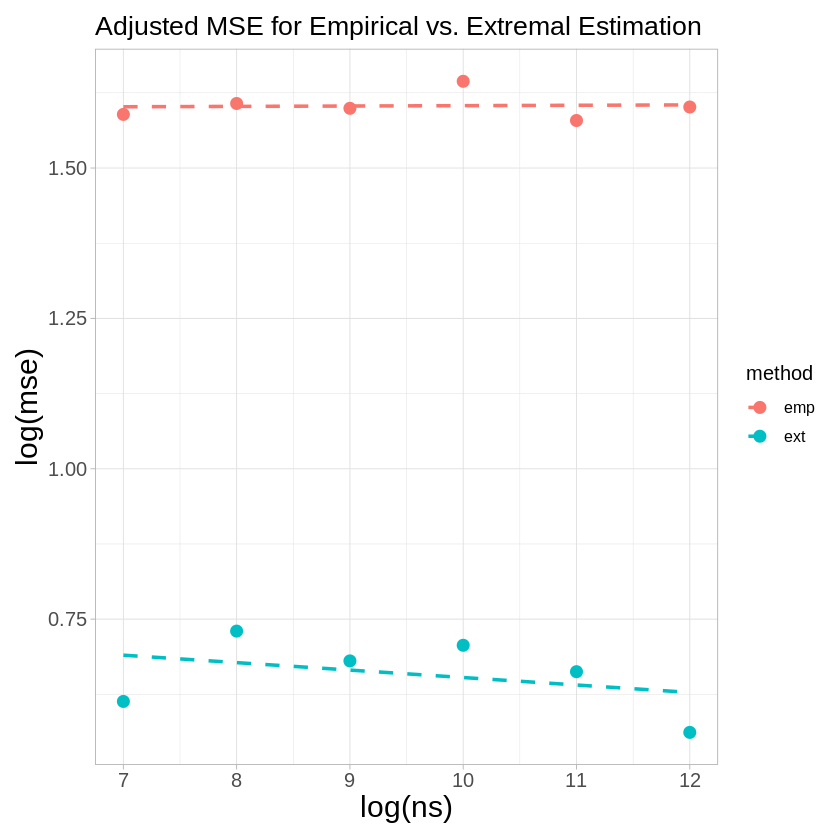

In [8]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [30]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'ext'))
linear_fit$coefficients

(Intercept)     log(ns) 
 2.84936650 -0.05992439

In [31]:
linear_fit <- lm(log(mse) ~ log(ns), data=adjusted_long_df_mse %>% filter(method == 'emp'))
linear_fit$coefficients

(Intercept)      log(ns) 
 1.649404599 -0.003025907

# Unknown Marginals (using transformation procedure)

In [18]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_probability_tests/rv_index_unknown/gamma_0.5/bivt_copula_df4_marginals_df4.RData')

In [19]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

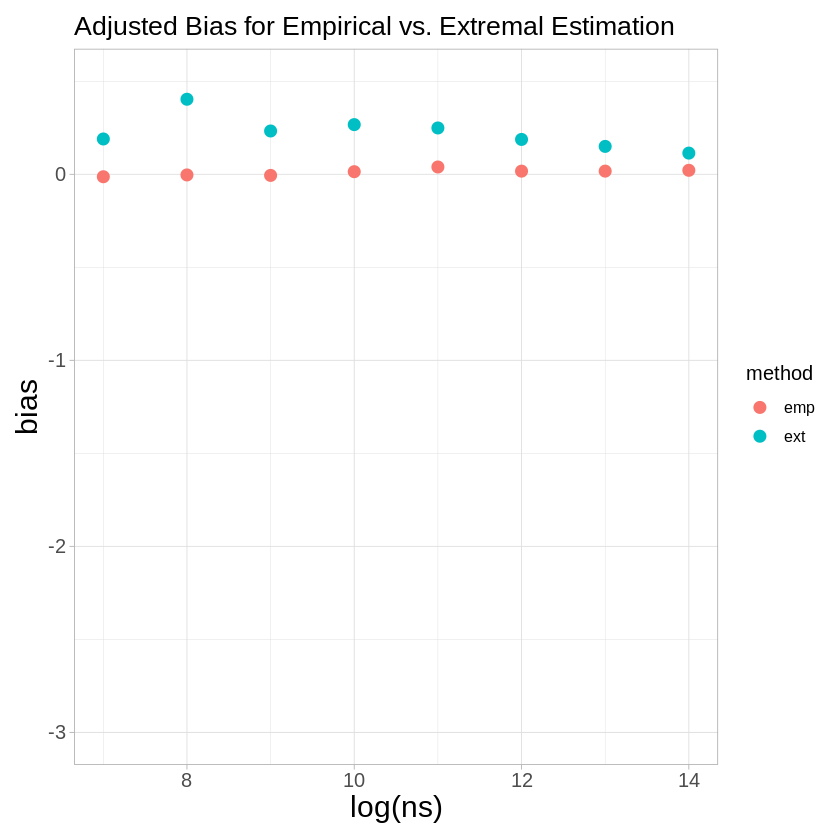

In [20]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + ylim(c(-3, 0.5)) +
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


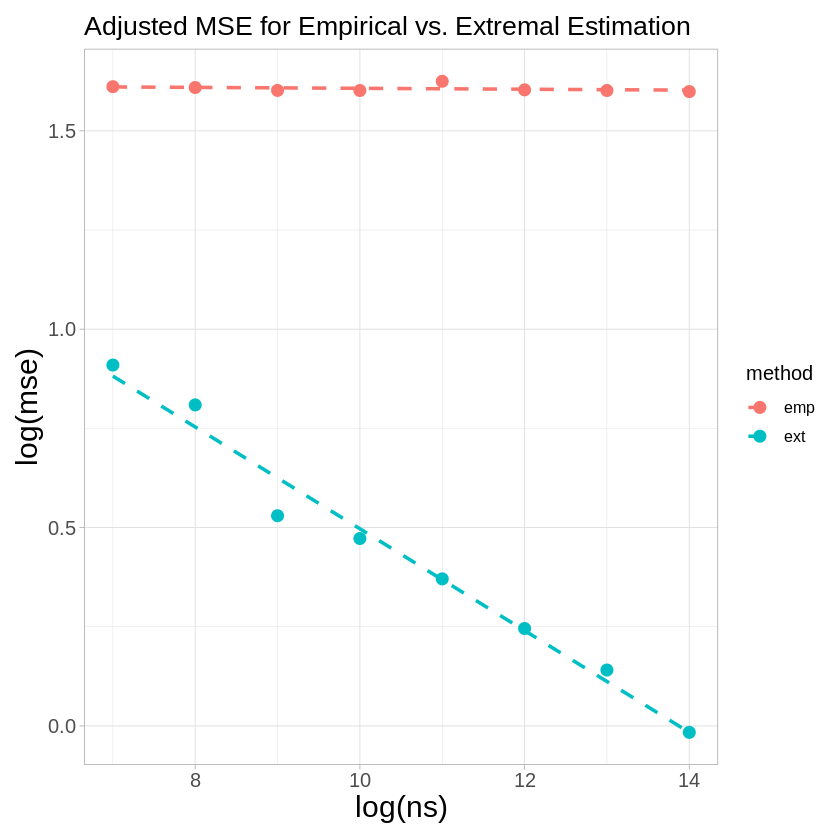

In [21]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

In [23]:
res <- readRDS('~/isolines_uq/data/theoretical_data/regular_variation_probability_tests/rv_index_unknown/gamma_0.5/bivt_copula_df1_marginals_df1.RData')

In [24]:
angle_res <- res[['pi/4']]
adjusted_df_bias <- angle_res %>% select(radii, ns, adjusted_ext_bias, adjusted_emp_bias) %>% rename('ext'='adjusted_ext_bias', 'emp'='adjusted_emp_bias')
adjusted_long_df_bias <- adjusted_df_bias %>% gather('method', 'bias', -c('radii', 'ns'))
adjusted_df_mse <- angle_res %>% select(radii, ns, adjusted_ext_mse, adjusted_emp_mse) %>% rename('ext'='adjusted_ext_mse', 'emp'='adjusted_emp_mse')
adjusted_long_df_mse <- adjusted_df_mse %>% gather('method', 'mse', -c('radii', 'ns'))

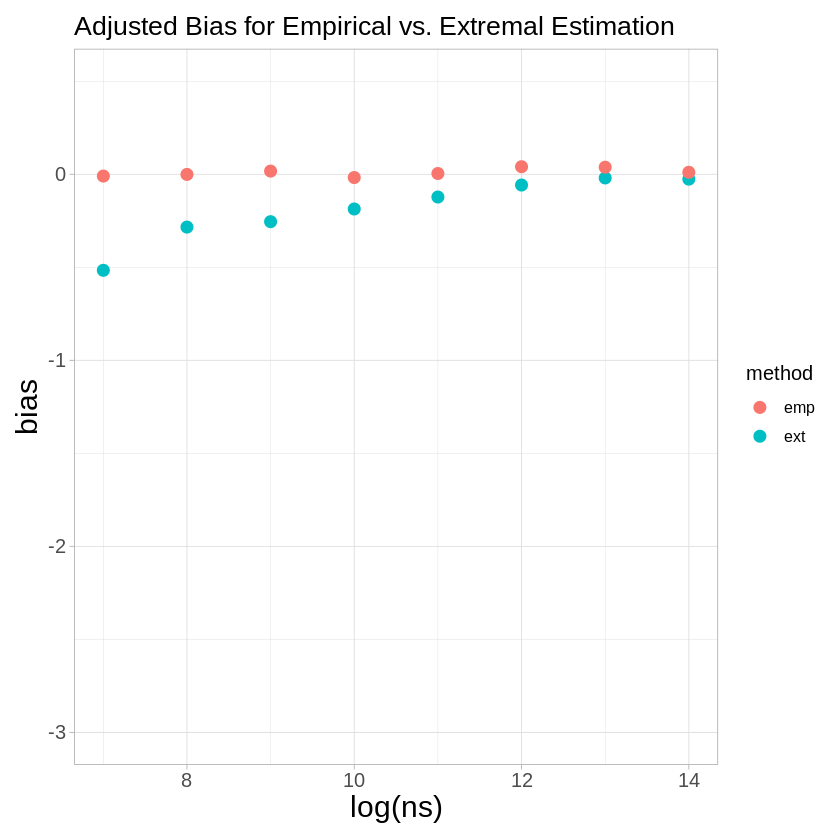

In [25]:
ggplot(adjusted_long_df_bias) + geom_point(aes(x=log(ns), y=bias, color=method), size=3) + theme_light() + ylim(c(-3, 0.5)) +
ggtitle('Adjusted Bias for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))

`geom_smooth()` using formula = 'y ~ x'


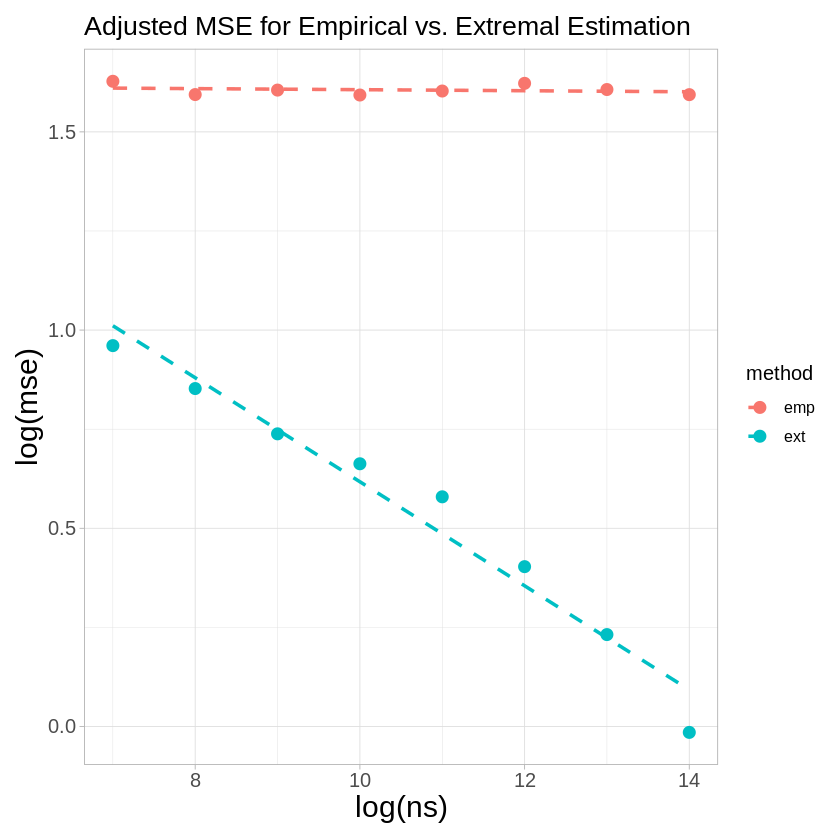

In [16]:
ggplot(adjusted_long_df_mse) + geom_point(aes(x=log(ns), y=log(mse), color=method), size=3) + geom_smooth(mapping=aes(x=log(ns), y=log(mse), color=method), method='lm', linetype='dashed', se=F) + theme_light() + ggtitle('Adjusted MSE for Empirical vs. Extremal Estimation') +
theme(axis.title = element_text(size = 18), 
      axis.text = element_text(size = 12), 
      text = element_text(size = 12),
      plot.title = element_text(size=16),
      plot.margin = margin(10, 10, 10, 10))